<a href="https://colab.research.google.com/github/OVIE-web/Avatar-project/blob/main/Avatar-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup

# URL of  the page to scrape
url = "https://avatar.fandom.com/wiki/Avatar_Wiki"

# Send a Get request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
   # Parse the HTML content using BeautifulSoup
   soup = BeautifulSoup(response.content, "html.parser")
   print(soup.prettify()) # Print the parsed HTML for exploration
else:
   print(f"Failed to retrieve the page. Status code: {response.status_code}")

<!DOCTYPE html>
<html class="client-nojs sse-other new-nav-canary" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Avatar Wiki | Fandom
  </title>
  <script>
   document.documentElement.className="client-js sse-other new-nav-canary";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"18398588c9c07fdfa322cb2735f0bd77","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Avatar_Wiki","wgTitle":"Avatar Wiki","wgCurRevisionId":2961224,"wgRevisionId":2961224,"wgArticleId":12516,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages using DynamicPageList3 parser tag","Avatar Wiki"],"wgPageContentLanguage":"en","wgPageContentModel":

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL of the page to scrape
url = "https://avatar.fandom.com/wiki/Avatar_Wiki"

# Send a Get request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
   # Parse the HTML content using BeautifulSoup
   soup = BeautifulSoup(response.content, "html.parser")

   # For instance: Extracting all the paragraphs
   paragraphs = soup.find_all('p')
   data = [p.text.strip() for p in paragraphs if p.text.strip()]

   # Save the data into a DataFrame
   df = pd.DataFrame(data, columns=["Text"])

   # Save to CVS file
   output_file = "output.csv"
   df.to_csv(output_file, index=False)
   print(f"Data saved to {output_file}")
else:
   print(f"Failed to retrieve the page. Status code: {response.status_code}")



Data saved to output.csv


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("output.csv")

# For instance clean steps:
# Remove rows with generic or irrelevant text
df = df[-df["Text"].str.contains("Generic", case=False)] # Example filter

# Save the cleaned data
df.to_csv("avatar_cleaned.csv", index=False)
print("Data cleaning completed and saved to 'avatar_cleaned.csv'")


Data cleaning completed and saved to 'avatar_cleaned.csv'


In [ ]:
from textblob import TextBlob

# Add sentiment scores
df["Sentiment"] = df["Text"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Save the data with sentiment scores
df.to_csv("avatar_sentiment.csv", index=False)
print("Sentiment analysis completed and saved to 'avatar_sentiment.csv'")


# Save the data with sentiment scores
df.to_csv("avatar_sentiment.csv", index=False)

Sentiment analysis completed and saved to 'avatar_sentiment.csv'


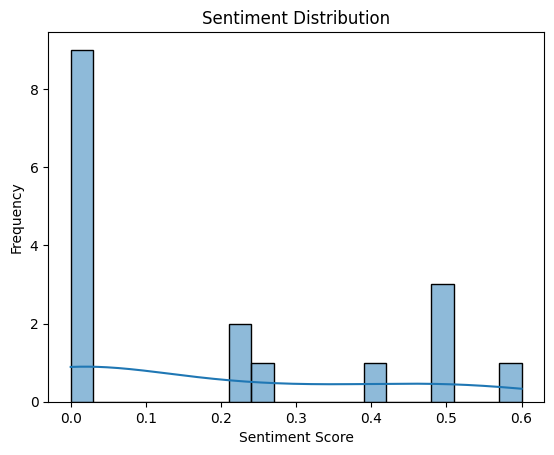

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribition
sns.histplot(df["Sentiment"], bins=20, kde=True)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Dictoionary of bedning styles and their techniques
bending_techniques = {
    "Air": ["Air Swipe", "Air Shield", "Air Scooter", "Air Blast"],
    "Water": ["Water Whip", "Ice Shield", "Water Bullet", "Healing"],
    "Earth": ["Earth Rumble", "Earth Wall", "Earthquake", "Metal Bending"],
    "Fire": ["Fire Blast", "Fire Shield", "Lightning", "Combustion"]
    # Add more styles and techniques as needed
}

# Convert the dictornary to a DataFrame
import  pandas as pd

df_bending = pd.DataFrame.from_dict(bending_techniques, orient="index").transpose()
print(df_bending)

           Air         Water          Earth         Fire
0    Air Swipe    Water Whip   Earth Rumble   Fire Blast
1   Air Shield    Ice Shield     Earth Wall  Fire Shield
2  Air Scooter  Water Bullet     Earthquake    Lightning
3    Air Blast       Healing  Metal Bending   Combustion


In [ ]:
# Count the number of techniques from each bending sytle
technique_counts = df_bending.count()
print(technique_counts)

Air      4
Water    4
Earth    4
Fire     4
dtype: int64


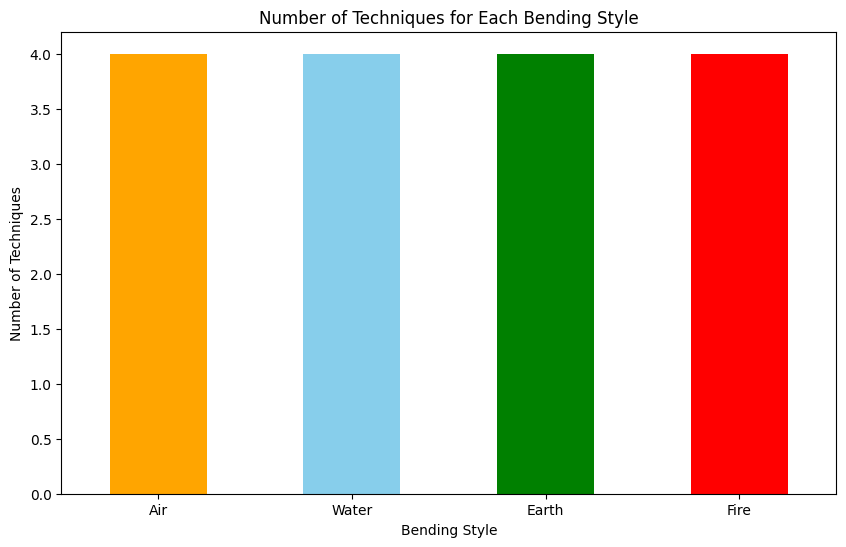

In [ ]:
import matplotlib.pyplot as plt

# Bar chart of the number of techniques for each bending style
technique_counts.plot(kind="bar", figsize=(10, 6),color= ['Orange', 'Skyblue', 'Green', 'Red'])
plt.title("Number of Techniques for Each Bending Style")
plt.xlabel("Bending Style")
plt.ylabel("Number of Techniques")
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Dictionary of strengths and weaknesses for each bending style
bending_strengths_weaknesses = {
    "Air": {"Strengths": "Agility, Evasion", "Weaknesses": "Lack of direct offense"},
    "Water": {"Strengths": "Versatility, Healing", "Weaknesses": "Dependent on water source"},
    "Earth": {"Strengths": "Defense, Power", "Weaknesses": "Lack of mobility"},
    "Fire": {"Strengths": "Offense, Speed", "Weaknesses": "Lack of defense"}
    # Add more styles and strengths/weaknesses as needed
}

# Convert the dictionary to a DataFrame
df_strengths_weaknesses = pd.DataFrame.from_dict(bending_strengths_weaknesses, orient="index")
print(df_strengths_weaknesses)

                  Strengths                 Weaknesses
Air        Agility, Evasion     Lack of direct offense
Water  Versatility, Healing  Dependent on water source
Earth        Defense, Power           Lack of mobility
Fire         Offense, Speed            Lack of defense


<ipython-input-28-87a92db466b2>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(df_strengths_weaknesses.applymap(len), annot=df_strengths_weaknesses, fmt="", cmap='coolwarm', cbar=False)


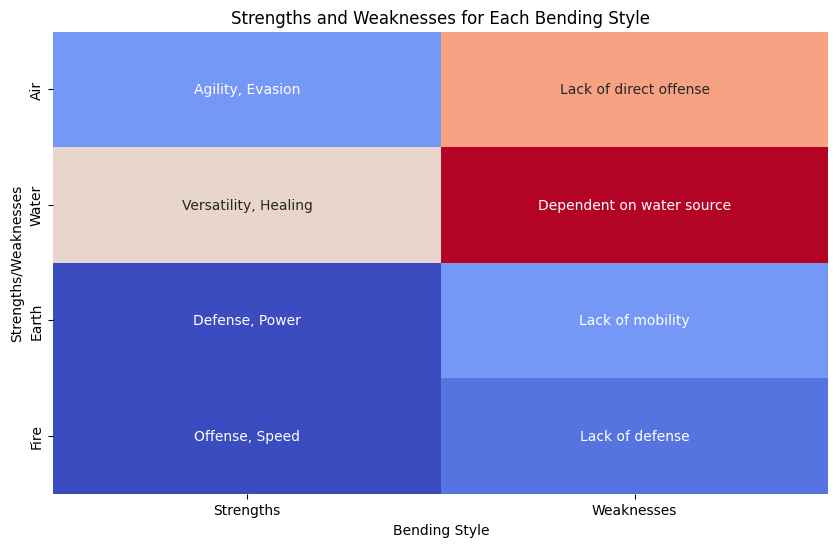

In [ ]:
# Heatmap of strengths and weaknesses
plt.figure(figsize=(10, 6))
sns.heatmap(df_strengths_weaknesses.applymap(len), annot=df_strengths_weaknesses, fmt="", cmap='coolwarm', cbar=False)
plt.title("Strengths and Weaknesses for Each Bending Style")
plt.xlabel("Bending Style")
plt.ylabel("Strengths/Weaknesses")
plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


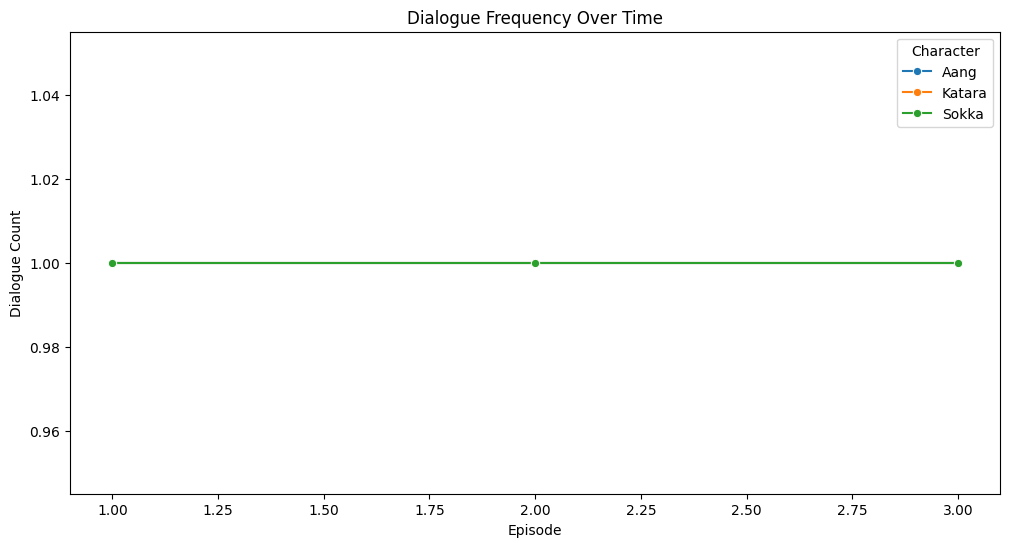

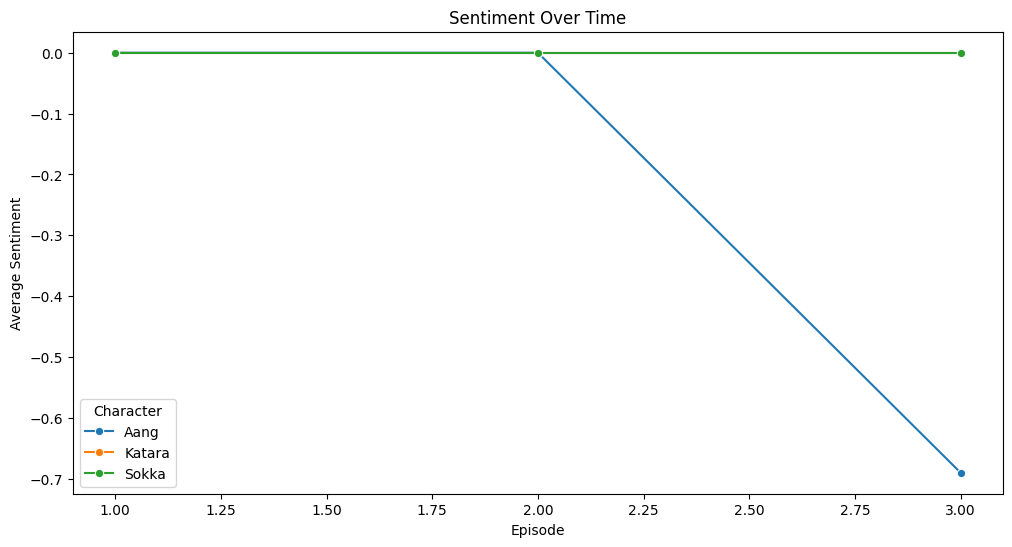

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data: Replace this with your actual data
data = {
    'Episode': [1, 1, 1, 2, 2, 2, 3, 3, 3],
    'Character': ['Aang', 'Katara', 'Sokka', 'Aang', 'Katara', 'Sokka', 'Aang', 'Katara', 'Sokka'],
    'Dialogue': [
        "I'm the Avatar!", "We need to find Aang.", "Let's go!",
        "I need to master all four elements.", "We should practice waterbending.", "I'm hungry.",
        "The Fire Nation is attacking!", "We must defend ourselves.", "I have a plan."
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Initialize Sentiment Intensity Analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Analyze sentiment for each dialogue
df['Sentiment'] = df['Dialogue'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Calculate dialogue frequency for each character
dialogue_frequency = df.groupby(['Episode', 'Character']).size().reset_index(name='DialogueCount')

# Plot dialogue frequency over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=dialogue_frequency, x='Episode', y='DialogueCount', hue='Character', marker='o')
plt.title('Dialogue Frequency Over Time')
plt.xlabel('Episode')
plt.ylabel('Dialogue Count')
plt.legend(title='Character')
plt.show()

# Calculate average sentiment for each character in each episode
average_sentiment = df.groupby(['Episode', 'Character'])['Sentiment'].mean().reset_index()

# Plot sentiment over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_sentiment, x='Episode', y='Sentiment', hue='Character', marker='o')
plt.title('Sentiment Over Time')
plt.xlabel('Episode')
plt.ylabel('Average Sentiment')
plt.legend(title='Character')
plt.show()


In [ ]:
import pandas as pd

# Assuming your actual data is in a DataFrame named df
# Save the DataFrame to a CSV file
output_file = 'avatar_dialogues.csv'
df.to_csv(output_file, index=False)

print(f"Data successfully saved to {output_file}")




Data successfully saved to avatar_dialogues.csv
